# Import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/image/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/image/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/image/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 42 files belonging to 3 classes.
Found 9 files belonging to 3 classes.
Found 12 files belonging to 3 classes.


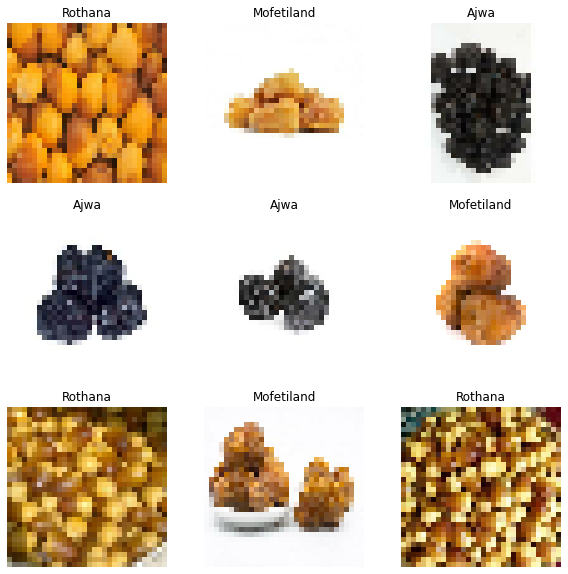

In [4]:
#SukkaryMofetiland --->Mofetiland

class_names = ["Ajwa", "Rothana", "Mofetiland"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(3))


In [6]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [7]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 30
)

Epoch 1/30
3/3 [==============================] - 6s 349ms/step - loss: 1.0941 - accuracy: 0.4524 - val_loss: 1.0513 - val_accuracy: 0.3333
Epoch 2/30
3/3 [==============================] - 1s 55ms/step - loss: 1.0256 - accuracy: 0.3571 - val_loss: 1.0026 - val_accuracy: 0.3333
Epoch 3/30
3/3 [==============================] - 1s 53ms/step - loss: 0.9755 - accuracy: 0.3333 - val_loss: 0.9325 - val_accuracy: 0.4444
Epoch 4/30
3/3 [==============================] - 0s 60ms/step - loss: 0.8818 - accuracy: 0.5714 - val_loss: 0.8590 - val_accuracy: 0.7778
Epoch 5/30
3/3 [==============================] - 0s 71ms/step - loss: 0.8086 - accuracy: 0.7381 - val_loss: 0.7798 - val_accuracy: 0.6667
Epoch 6/30
3/3 [==============================] - 1s 55ms/step - loss: 0.6888 - accuracy: 0.7381 - val_loss: 0.6502 - val_accuracy: 0.8889
Epoch 7/30
3/3 [==============================] - 1s 48ms/step - loss: 0.5589 - accuracy: 0.9048 - val_loss: 0.5415 - val_accuracy: 0.6667
Epoch 8/30
3/3 [==========

In [8]:
model.evaluate(test_ds)

1/1 [==============================] - 0s 186ms/step - loss: 0.2326 - accuracy: 0.9167


[0.23260264098644257, 0.9166666865348816]

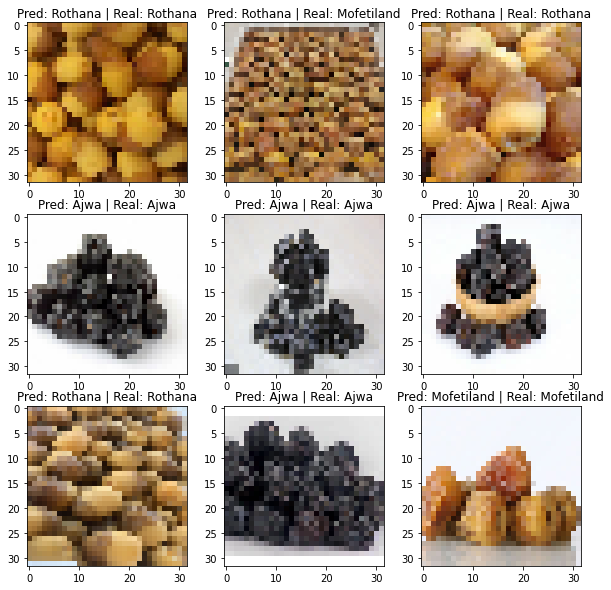

In [9]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [10]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("DFModel.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpy07w0l6b/assets
